<a href="https://colab.research.google.com/github/weagan/Convolutional-Neural-Networks/blob/main/MNIST_CNN_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network from Scratch | Mathematics & Python Code
https://youtu.be/Lakz2MoHy6o?si=1tpGFgGpecKkwj7P

In [1]:
import os
import shutil

directory_to_remove = '/content/Neural-Network'

# Check if the directory exists
if os.path.exists(directory_to_remove):
    print(f"Removing existing directory: {directory_to_remove}")
    shutil.rmtree(directory_to_remove)
    print("Directory removed.")
else:
    print(f"Directory {directory_to_remove} does not exist. No need to remove.")

# Change to /content before cloning to ensure a valid working directory
os.chdir('/content')
print("Changed current directory to /content")

# Clone the repository
!git clone https://github.com/TheIndependentCode/Neural-Network

# Change to the cloned directory
os.chdir(directory_to_remove)
print(f"Changed current directory to {directory_to_remove}")

# Verify current directory
!pwd

Directory /content/Neural-Network does not exist. No need to remove.
Changed current directory to /content
Cloning into 'Neural-Network'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 50 (delta 17), reused 14 (delta 14), pack-reused 21 (from 1)
Receiving objects: 100% (50/50), 9.82 KiB | 9.82 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Changed current directory to /content/Neural-Network
/content/Neural-Network


In [2]:
cd /content/Neural-Network

/content


In [3]:
%%writefile /content/Neural-Network/mnist_conv.py
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from dense import Dense
from convolutional import Convolutional
from reshape import Reshape
from activations import Sigmoid
from losses import binary_cross_entropy, binary_cross_entropy_prime
from network import train, predict

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    two_index = np.where(y == 2)[0][:limit] # Added for number '2'
    three_index = np.where(y == 3)[0][:limit] # Added for number '3'
    four_index = np.where(y == 4)[0][:limit] # Added for number '4'
    all_indices = np.hstack((zero_index, one_index, two_index, three_index, four_index)) # Included new indices
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255

    # Map original labels (0, 1, 2, 3, 4) to consecutive integers (0, 1, 2, 3, 4)
    y_mapped = np.zeros_like(y, dtype=int)
    y_mapped[y == 0] = 0
    y_mapped[y == 1] = 1
    y_mapped[y == 2] = 2
    y_mapped[y == 3] = 3
    y_mapped[y == 4] = 4

    y = to_categorical(y_mapped, num_classes=5) # Use mapped labels and specify num_classes=5
    y = y.reshape(len(y), 5, 1) # Reshape for 5 classes
    return x, y



# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 500) # Increased limit to 500
x_test, y_test = preprocess_data(x_test, y_test, 10)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 5), # Changed to 5 for 5 classes
    Sigmoid()
]

# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    learning_rate=0.1
)

# test
total = 0
correct = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    total+=1
    if np.argmax(output) == np.argmax(y):
        correct+=1
    else:
        print("incorrect")
print(f"Accuracy: {correct/total*100}%")


Overwriting /content/Neural-Network/mnist_conv.py


In [4]:
# Run the modified script
!python3 mnist_conv.py

2025-12-15 20:31:39.340956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765830699.372379     734 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765830699.382471     734 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765830699.406695     734 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765830699.406738     734 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765830699.406748     734 computation_placer.cc:177] computation placer alr

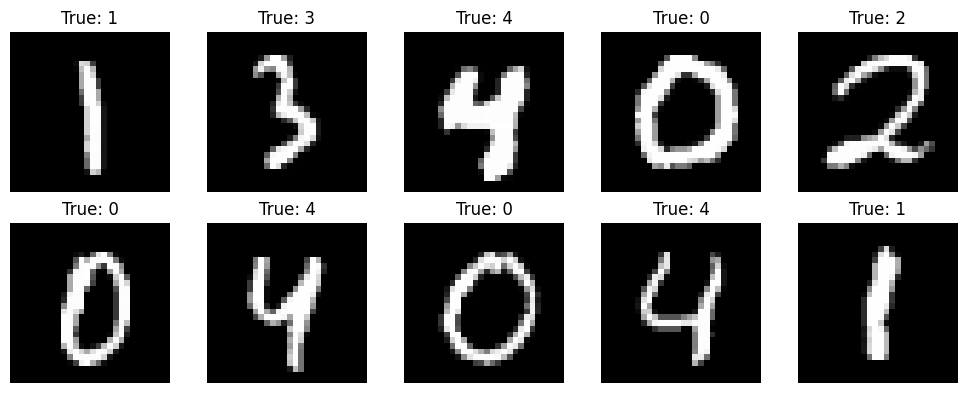

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    two_index = np.where(y == 2)[0][:limit]
    three_index = np.where(y == 3)[0][:limit]
    four_index = np.where(y == 4)[0][:limit]
    all_indices = np.hstack((zero_index, one_index, two_index, three_index, four_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255

    y_mapped = np.zeros_like(y, dtype=int)
    y_mapped[y == 0] = 0
    y_mapped[y == 1] = 1
    y_mapped[y == 2] = 2
    y_mapped[y == 3] = 3
    y_mapped[y == 4] = 4

    y = to_categorical(y_mapped, num_classes=5)
    y = y.reshape(len(y), 5, 1)
    return x, y

# Load and preprocess data specifically for this cell
# Using temporary variables for train set as only x_test and y_test are needed here
(x_train_temp, y_train_temp), (x_test, y_test) = mnist.load_data()
x_test, y_test = preprocess_data(x_test, y_test, 10)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()